# Wrangling data from US wildfires and temperature data into a new dataframe, calculate correlation between variables, discover correlation patterns by line plots, and visualise correlation with seaborn

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# US wildfire data

Note: For efficiency purposes, the next three cells can be skipped if the CSV file: 
'..... /wildfire.csv' has already been created.  
In that case, the cell dfWildfires = pd.read_csv('...'), which reads the wildfire 
csv file can be activated. 

In [5]:
import sqlite3

US wildfire data is contained in a sqlite database, which was orginally downlaoded from Kaggle. URL: https://www.kaggle.com/rtatman/188-million-us-wildfires, last accessed: 25-01-2021. 

The sqlite query is readed into a pandas Dataframe, a process that usually takes minutes. 
By giving the query a variable name, and later calling that name in a display method, verifies that data from the sqlite database is stored by means of the SQL query into the dataframe. 

In [7]:
file = '/Users/stevenkraamwinkel/Desktop/Data wrangling/Project/FPA_FOD_20170508.sqlite'

con = sqlite3.connect(file)
df = pd.read_sql_query("SELECT * FROM fires", con) 

display(df)
print(df.head())
con.close()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE_CLASS  \
0                  0511     Plumas National Forest  ...    

In [8]:
df.to_csv('/Users/stevenkraamwinkel/Desktop/Data wrangling/Project/wildfire.csv')

Below is the full dataset in CSV file. It contains wildfire data from wildfires that occurred in all states of the USA (Alaska and Hawaii excluded) between 01-01-1992 and 31-12-2015.

In [5]:
dfWildfires = pd.read_csv('/Users/stevenkraamwinkel/Desktop/Data wrangling/Project/wildfire.csv', parse_dates=True)
display(dfWildfires)

/Users/stevenkraamwinkel/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


## Data explanation
#### Same explanation as other notebook (correlating fire data with air pollution)

US wildfire data is a CSV file that is converted from a database of wildfires that occurred in the United States between 1992 and 2015. Data was collected from both various reporting agencies on federal, state and local level. 

Since the original CSV file contains data from over more than 1.88 million wildfires in the USA, and each fire is specified over 40 columns, we have decided quickly to focus on only the most relevant data pieces. 

Goal of this research is to relate the number and size of wildfires to other variables like temperature, drought, and air pollution. Therefore, in this large CSV file, we focus on the variables FIRE_YEAR and FIRE_SIZE. In another notebook also on the variables DATE_DISCOVERY, STAT_CAUSE_DESCR, and STATE. 

FIRE_YEAR = Calendar year in which the fire was discovered or confirmed to exist. \
FIRE_SIZE = Estimate of acres within the final perimeter of the fire.
DATE_DISCOVERY = Date on which the fire was discovered or confirmed to exist. \
STATE_CAUSE_DESCR = Description of the (statistical) cause of the fire. \
STATE = Two-letter alphabetic code for the state in which the fire burned (or originated), based on the nominal designation in the fire report.

Out of these two columns two new data columns were wrangled, 'fires per year' and 'average fire size' by means of groupby mechanisms. 

In [6]:
fires_per_year = dfWildfires.groupby('FIRE_YEAR')['OBJECTID'].nunique()
display(fires_per_year)

FIRE_YEAR
1992     67975
1993     61989
1994     75955
1995     71472
1996     75574
1997     61450
1998     68370
1999     89363
2000     96416
2001     86587
2002     75656
2003     68261
2004     69279
2005     88604
2006    114004
2007     95573
2008     85378
2009     78325
2010     79889
2011     90552
2012     72769
2013     64780
2014     67753
2015     74491
Name: OBJECTID, dtype: int64

In [7]:
average_fire_size = dfWildfires.groupby('FIRE_YEAR')['FIRE_SIZE'].mean()
display(average_fire_size)

FIRE_YEAR
1992     32.364222
1993     35.356208
1994     54.198875
1995     28.676755
1996     79.460604
1997     52.313024
1998     29.414983
1999     68.039342
2000     79.234760
2001     43.009601
2002     89.923580
2003     65.682790
2004    118.855760
2005    109.082041
2006     88.097768
2007     96.946091
2008     63.324652
2009     77.333752
2010     43.728864
2011    106.277026
2012    129.724037
2013     69.350145
2014     54.218860
2015    137.174526
Name: FIRE_SIZE, dtype: float64

# US Land temperatures 

US land temperatures were wrangled from a dataset which contained global temperature data. Source URL: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv, Last accessed: 25-01-2021

In the orginal CSV file some data items had to be modified in order to read and display the dataset properly. Most CSV files are read by comma separated data items, and some items contained another comma in the data itself. For example data items contained the name 'Bonaire, Saint Eustatius And Saba' were replace by 'Bonaire Saint Eustatius And Saba'. 


In [8]:
file = '/Users/stevenkraamwinkel/Desktop/Data wrangling/Project/GlobalLandTemperaturesByCountry.csv'

df_c = pd.read_csv(file,index_col=0, parse_dates=True)
display(df_c)

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland
...,...,...,...
2013-05-01,19.059,1.022,Zimbabwe
2013-06-01,17.613,0.473,Zimbabwe
2013-07-01,17.000,0.453,Zimbabwe


## DATA EXPLANATION

The datasets contains average land tempetures from all countries in the world, ranging from datetimes between 1743 and 2013, and was originally glued together by the Berkeley Earth. 

Many countries contain missing data in the 1700's and 1800's. For our research US land temperatures were extracted from the larger CSV dataset, and US temperature data was collected from 1992 until 2013. 

dt = Stand for the data in which the data was collected. \
AverageTemperature = global average land temperature in celsius. \
AverageTemperatureUncertainty: the 95% confidence interval around the average. \
Country = The country in which the tempature was measured and the data was collected.


In [9]:
df_c = df_c[df_c['Country']=='United States']
df_c = df_c.loc['1992':]

### Resampling time series data 

In [10]:
df_c = df_c.resample('Y').mean()

styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-family", "arial"),
    ("font-size", "140%"),
    ("color", 'black')])]  

df_c.style.set_table_attributes("style='display:inline; font-size:100%' ") \
.set_caption("US yearly average temperatures").set_table_styles(styles)    

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1992-12-31 00:00:00,9.05633,0.203
1993-12-31 00:00:00,8.86725,0.165833
1994-12-31 00:00:00,9.27033,0.165833
1995-12-31 00:00:00,9.331,0.148167
1996-12-31 00:00:00,8.75433,0.13975
1997-12-31 00:00:00,9.17292,0.1675
1998-12-31 00:00:00,10.1412,0.127917
1999-12-31 00:00:00,9.567,0.1455
2000-12-31 00:00:00,9.64975,0.16225


## Modifying and resizing dataframes for merge 

In [11]:
data_c = df_c.reset_index()
data_c['dt'] = data_c['dt'].astype(str)
data_c['dt'] = pd.to_datetime(data_c['dt']).dt.year
data_c['dt'] = pd.to_numeric(data_c['dt'], errors='coerce')
data_c = data_c.drop([21])
data_c = data_c.rename(columns={'dt': 'Year'})
display(data_c)

,Year,AverageTemperature,AverageTemperatureUncertainty
0,1992,9.056333,0.203000
1,1993,8.867250,0.165833
2,1994,9.270333,0.165833
3,1995,9.331000,0.148167
4,1996,8.754333,0.139750
5,1997,9.172917,0.167500
6,1998,10.141167,0.127917
7,1999,9.567000,0.145500
8,2000,9.649750,0.162250
9,2001,9.785583,0.138750


In [12]:
data_c.dtypes

Year                               int64
AverageTemperature               float64
AverageTemperatureUncertainty    float64
dtype: object

In [13]:
df = pd.DataFrame(fires_per_year).reset_index()
nr_fires_df = df.rename(columns={'OBJECTID':'NUMBER_OF_FIRES', 'FIRE_YEAR':'Year'})
nr_fires_df = nr_fires_df[:21]

dataf = pd.DataFrame(average_fire_size).reset_index()
fire_size_df = dataf.rename(columns={'FIRE_YEAR': 'Year', 'OBJECTID':'FIRE_SIZE'})
fire_size_df = fire_size_df[:21]

display(nr_fires_df)
print(nr_fires_df.dtypes)
display(fire_size_df)
print(fire_size_df.dtypes)

,Year,NUMBER_OF_FIRES
0,1992,67975
1,1993,61989
2,1994,75955
3,1995,71472
4,1996,75574
5,1997,61450
6,1998,68370
7,1999,89363
8,2000,96416
9,2001,86587


Year               int64
NUMBER_OF_FIRES    int64
dtype: object


,Year,FIRE_SIZE
0,1992,32.364222
1,1993,35.356208
2,1994,54.198875
3,1995,28.676755
4,1996,79.460604
5,1997,52.313024
6,1998,29.414983
7,1999,68.039342
8,2000,79.234760
9,2001,43.009601


Year           int64
FIRE_SIZE    float64
dtype: object


## Merging dataframes into new dataframe

In [14]:
merged_frame1 = pd.merge(data_c, nr_fires_df, on='Year')
new_dataframe = pd.merge(merged_frame1, fire_size_df, on='Year')
new_dataframe = new_dataframe.drop(['AverageTemperatureUncertainty'], axis = 1)

styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-family", "arial"),
    ("font-size", "120%"),
    ("color", 'black')])]  

new_dataframe.style.set_table_attributes("style='display:inline; font-size:100%' ") \
.set_caption("Complete dataframe containing US average temparature, number of fires per year and the average \
             fire size").set_table_styles(styles)    
       

,Year,AverageTemperature,NUMBER_OF_FIRES,FIRE_SIZE
0,1992,9.05633,67975,32.3642
1,1993,8.86725,61989,35.3562
2,1994,9.27033,75955,54.1989
3,1995,9.331,71472,28.6768
4,1996,8.75433,75574,79.4606
5,1997,9.17292,61450,52.313
6,1998,10.1412,68370,29.415
7,1999,9.567,89363,68.0393
8,2000,9.64975,96416,79.2348
9,2001,9.78558,86587,43.0096


In [15]:
column_nr_1 = new_dataframe['AverageTemperature']
column_nr_2 = new_dataframe['NUMBER_OF_FIRES']
column_nr_3 = new_dataframe['FIRE_SIZE']

correlation_temp_NumberOfFires = column_nr_1.corr(column_nr_2)
correlation_temp_FireSize = column_nr_1.corr(column_nr_3)
correlation_NumberOfFires_FireSize = column_nr_2.corr(column_nr_3)

print("The correlation between the average temperature and the number of fires is: {:.2f}".format(correlation_temp_NumberOfFires))
print("The correlation between the average temperature and the average size of a fire is : {:.2f}".format(correlation_temp_FireSize))
print("The correlation between the number of fires and the average size of a fire is: {:.2f}".format(correlation_NumberOfFires_FireSize))

The correlation between the average temperature and the number of fires is: 0.34
The correlation between the average temperature and the average size of a fire is : 0.43
The correlation between the number of fires and the average size of a fire is: 0.37


## Linegraphs between variables from dataframe 

For visualisation purposes linegraphs were created to make relationships between any two variables (Average temperature, number of fires, fire size) visible. It is very suitable to display data in a linegraph, since it visualises the developement of a variable over time. Between two variables a linegraph can display whether or not two variables follow approximately the same pattern over time. 

The following three linegraphs shows the change of the average temperature with the nubmer of fires, the average temperature with the fire size, and the change of the number of fires and the fire size over a 20-year time period. 

<function matplotlib.pyplot.show(*args, **kw)>

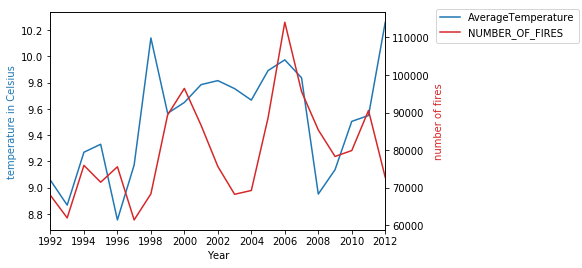

In [16]:
ax = new_dataframe.plot(x="Year", y="AverageTemperature", legend=False) 
color ='tab:blue'
ax.set_ylabel('temperature in Celsius', color=color)

ax2 = ax.twinx()
new_dataframe.plot(x="Year", y="NUMBER_OF_FIRES", ax=ax2, legend=False, color='tab:red')
color='tab:red'
ax2.set_ylabel('number of fires', color=color)
plt.xticks([1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012])
ax2.figure.legend(bbox_to_anchor=(1.01, 0.9), loc='upper left', borderaxespad=0.)
plt.show

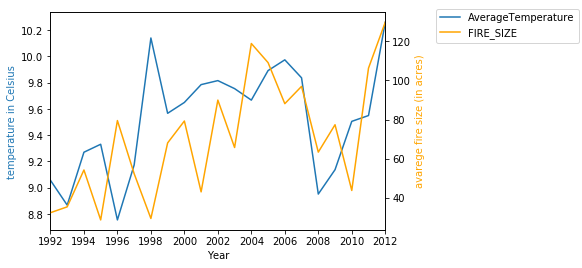

In [17]:
ax = new_dataframe.plot(x="Year", y="AverageTemperature", legend=False, color ='tab:blue')
color ='tab:blue'
ax.set_ylabel('temperature in Celsius', color=color)

ax2 = ax.twinx()
new_dataframe.plot(x="Year", y="FIRE_SIZE", ax=ax2, legend=False, color='orange')
color='orange'
ax2.set_ylabel('avarege fire size (in acres)', color=color)
plt.xticks([1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012])
ax2.figure.legend(bbox_to_anchor=(1.01, 0.9), loc='upper left', borderaxespad=0.)
plt.show()

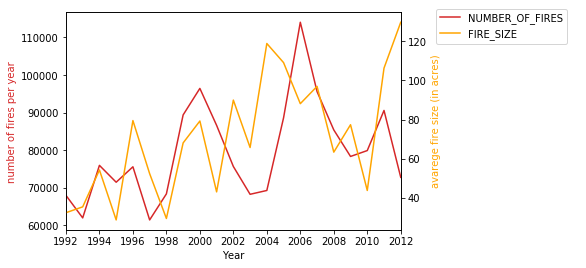

In [18]:
ax = new_dataframe.plot(x="Year", y="NUMBER_OF_FIRES", legend=False, color ='tab:red')
ax.set_ylabel('number of fires per year', color='tab:red')

ax2 = ax.twinx()
new_dataframe.plot(x="Year", y="FIRE_SIZE", ax=ax2, legend=False, color='orange')
color='orange'
ax2.set_ylabel('avarege fire size (in acres)', color=color)
plt.xticks([1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012])
ax2.figure.legend(bbox_to_anchor=(1.01, 0.9), loc='upper left', borderaxespad=0.)
plt.show()

### Linegraph of two very strongly correlated variables 

In [19]:
greenhouse_data = '/Users/stevenkraamwinkel/Desktop/Data wrangling/Project/climate_change.csv'
greenhouse_df = pd.read_csv(greenhouse_data, index_col=0, parse_dates=True, sep=';')
year_averages = greenhouse_df.groupby('Year').mean()
pd.options.display.float_format = '{:.3f}'.format
adj_df = year_averages.drop(['Month', 'MEI','Aerosols','Temp',], 
               axis = 1) 
adj_dfyears = adj_df['1992-01-01':'2008-01-01'] 
greenhouse_newdf = adj_dfyears.reset_index()
greenhouse_newdf['Year'] = greenhouse_newdf['Year'].astype(str)
greenhouse_newdf['Year'] = pd.to_datetime(greenhouse_newdf['Year']).dt.year
greenhouse_newdf['Year'] = pd.to_numeric(greenhouse_newdf['Year'], errors='coerce')


Greenhouse data CSV file downloaded from kaggle. URL: ttps://www.kaggle.com/econdata/climate-change, last accessed: 11-01-2021

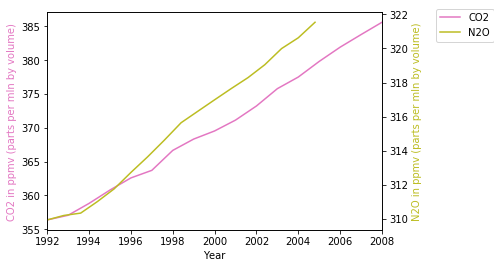

In [20]:
ax = greenhouse_newdf.plot(x="Year", y="CO2", legend=False, color ='tab:pink')
ax.set_ylabel('CO2 in ppmv (parts per mln by volume)', color='tab:pink')

ax2 = ax.twinx()
greenhouse_newdf.plot(x="Year", y="N2O", ax=ax2, legend=False, color='tab:olive')
color='tab:olive'
ax2.set_ylabel('N2O in ppmv (parts per mln by volume)', color=color)
plt.xticks([1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012])
ax2.figure.legend(bbox_to_anchor=(1.01, 0.9), loc='upper left', borderaxespad=0.)
plt.show()

## Correlation plots between average temperature, number of fires, and fire size from dataframe

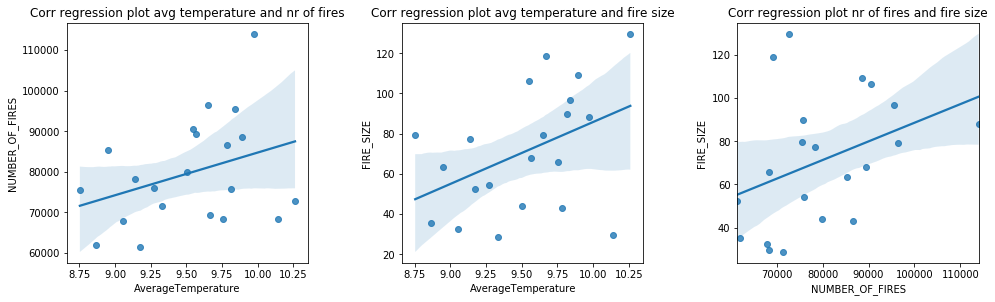

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(14, 4.3))
sns.regplot(x='AverageTemperature', y='NUMBER_OF_FIRES', data=new_dataframe, ax=axs[0]).set_title('Corr regression plot avg temperature and nr of fires')
sns.regplot(x='AverageTemperature', y='FIRE_SIZE', data=new_dataframe, ax=axs[1]).set_title('Corr regression plot avg temperature and fire size')
sns.regplot(x='NUMBER_OF_FIRES', y='FIRE_SIZE', data=new_dataframe, ax=axs[2]).set_title('Corr regression plot nr of fires and fire size')
fig.tight_layout()


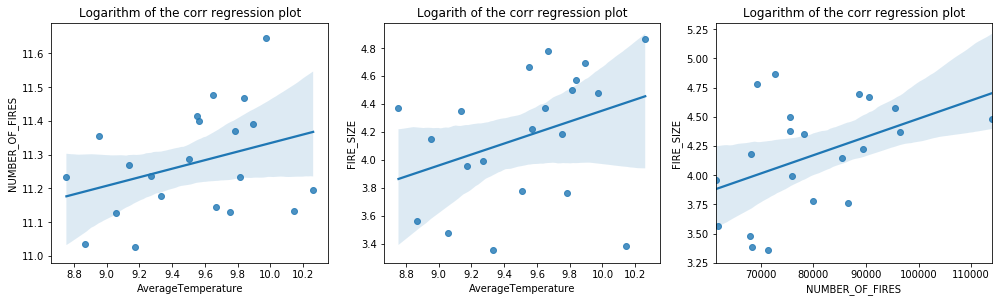

In [27]:
fig, axs = plt.subplots(ncols=3, figsize=(14, 4.3))
sns.regplot(x=new_dataframe['AverageTemperature'], y=np.log(new_dataframe['NUMBER_OF_FIRES']), ax=axs[0]).set_title('Logarithm of the corr regression plot')
sns.regplot(x=new_dataframe['AverageTemperature'], y=np.log(new_dataframe['FIRE_SIZE']), ax=axs[1]).set_title('Logarith of the corr regression plot')
sns.regplot(x=new_dataframe['NUMBER_OF_FIRES'], y=np.log(new_dataframe['FIRE_SIZE']), ax=axs[2]).set_title('Logarithm of the corr regression plot')
fig.tight_layout()


In [28]:
column_nr_1 = np.log(new_dataframe['AverageTemperature'])
column_nr_2 = np.log(new_dataframe['NUMBER_OF_FIRES'])
column_nr_3 = np.log(new_dataframe['FIRE_SIZE'])

correlation_temp_NumberOfFires = column_nr_1.corr(column_nr_2)
correlation_temp_FireSize = column_nr_1.corr(column_nr_3)
correlation_NumberOfFires_FireSize = column_nr_2.corr(column_nr_3)

print("The correlation between the average temperature and the number of fires is: {:.2f}".format(correlation_temp_NumberOfFires))
print("The correlation between the average temperature and the average size of a fire is : {:.2f}".format(correlation_temp_FireSize))
print("The correlation between the number of fires and the average size of a fire is: {:.2f}".format(correlation_NumberOfFires_FireSize))

The correlation between the average temperature and the number of fires is: 0.34
The correlation between the average temperature and the average size of a fire is : 0.35
The correlation between the number of fires and the average size of a fire is: 0.45


## Boxplot and dist plot visualization to show data distribution and detect outliers

The gathered data from the dataframe is also visualised in boxplot an distribution diagrams. These show how exactly which numeric values have been recorded for the average temperature, the number of wildfires, and the average fire size. These diagrams are able to detect skewness in data disbribution. Boxplot visualisation is able to detect those values that are far relatively far away from the median value (the center stripe in the colored shaped box). A disbritution plot would than indicate a large tail on the left or right side of the diagram. 

Our research indicates that the number of fires is right skewed, since the boxplot shows a longer line right of the colored box, and the distribution plot a large tail on the right end side. 

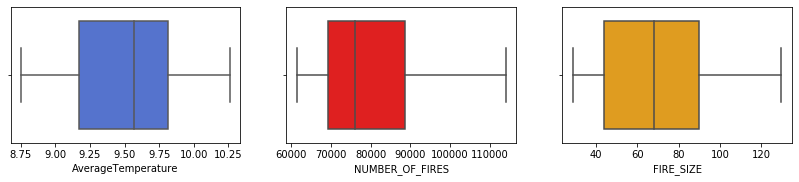

In [20]:
fig, axs = plt.subplots(ncols=3, figsize=(14,2.5))
sns.boxplot(x="AverageTemperature", data=new_dataframe, color='royalblue',ax=axs[0])
sns.boxplot(x="NUMBER_OF_FIRES", data=new_dataframe, color='red', ax=axs[1])
sns.boxplot(x="FIRE_SIZE", data=new_dataframe, color='orange', ax=axs[2])


### Data distribution plots 

Visualized with seaborn version 0.10

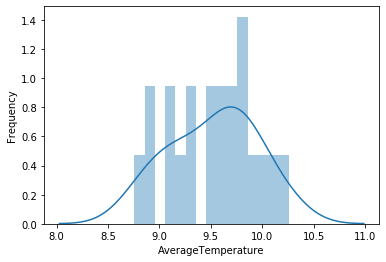

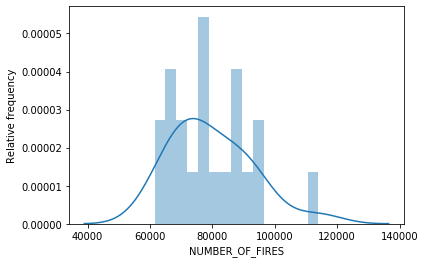

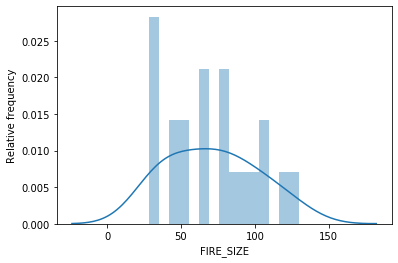

In [60]:
data_temps = new_dataframe['AverageTemperature']
sns.distplot(data_temps, bins=15, kde = True, norm_hist=True)
plt.ylabel('Frequency')
plt.show()

data_fires = new_dataframe['NUMBER_OF_FIRES']
sns.distplot(data_fires, bins=15, kde = True, norm_hist=True)
plt.ylabel('Relative frequency')
plt.show()

data_sizes = new_dataframe['FIRE_SIZE']
sns.distplot(data_sizes, bins=15, kde = True, norm_hist=True)
plt.ylabel('Relative frequency')
plt.show()


END OF NOTEBOOK